This is a part with a graphs for my diploma

In [9]:
from sympy import*
from sympy import plot
import numpy as np
import matplotlib.pyplot as plt
init_printing()

In [10]:
I, I1, I2, Delta_w, w, w_r, theta, rel = symbols('I, I1, I2, Delta_w, w, w_r, theta, rel')
k_w, lambda_w, L, c, gamma_bar = symbols('k_w, lambda_w, L, c, gamma_bar')

In [11]:
c = 299792458 #m/s
#L = 1.5 #m
lambda_w = 20 * 1e-3 #m undulator period length
gamma_bar = 6000 #Ebeam/m_e
k_w = 2*pi/lambda_w
w_r = 2*c*gamma_bar**2*k_w #resonant frequency

#theta = -0.00000
I = (sinc(((k_w + w_r*theta**2/(2*c))*rel + w_r*theta**2/2/c)*L/2))**2
#P = plot(I, (rel, -0.05, 0.05), adaptive=False, nb_of_points=400, show=False,
#         xlabel=r'$\mathrm{\Delta\omega / \omega}$',
#         ylabel=r'$\mathrm{I/I_0}$',
#         line_color='black')#, show=False)

#P.save('/home/andrei/Desktop/spec.pdf')
print(I)

sinc(L*(rel*(3600000000.0*pi*theta**2 + 100.0*pi) + 3600000000.0*pi*theta**2)/2)**2


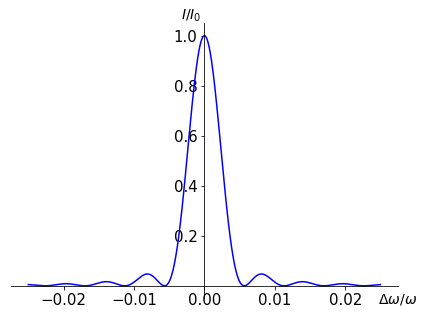

In [12]:
def Intens(rel, theta, L):
    return np.sinc((0.75*rel*(3600000000.0*np.pi*theta**2 + 100.0*np.pi) + 2700000000.0*np.pi*theta**2)*L/2)**2

rel = np.arange(-0.025,0.025, 0.00001)
theta = 0
L = 1.5
plt.figure(figsize=(1.5*4,1.5*3))
plt.plot(rel, Intens(rel,theta, L), color='blue')
plt.xlabel(r'$\Delta\omega/\omega$', fontsize=14, labelpad = 0.0)
y = plt.ylabel(r'$I/I_0$', fontsize=14, labelpad = 0.0, rotation=90)
y.set_rotation(0)

plt.xticks([-0.02, -0.01, 0, 0.01, 0.02],fontsize=14)
        #  [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([0.2, 0.4,0.6,0.8, 1.0], fontsize=14)
        #  [r'$-1$', r'$0$', r'$+1$'])
        
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
ax.xaxis.set_label_coords(1, 0.025)
ax.yaxis.set_label_coords(0.465, 1.0)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(15)
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.01))

plt.tight_layout()
plt.savefig('/home/andrei/Documents/SKIF_XAS_beamline/TeXDoc/pic/spec.pdf')#, bbox_inches='tight')
plt.show()

The same graphs in normilised units $\hat{C} = CL = 2\pi N\cfrac{\Delta\omega}{\omega_r}$ and $\hat{\theta} = \theta\sqrt{\cfrac{\omega L}{c}}$

Field distribution is: $\hat{E}_{\bot} = e^{i\Phi}
		\cfrac{\sin\bigg(\cfrac{\hat{C}}{2} + 
		\cfrac{\hat{\theta}^2}{4}\bigg)}{\cfrac{\hat{C}}{2} + 
		\cfrac{\hat{\theta}^2}{4}}$

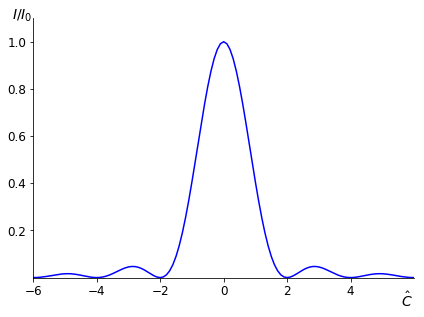

In [32]:
def Inten(C, theta):
    return (np.sinc(C/2 + theta**2/4))**2

C = np.arange(-6.5,6.5, 0.1)
theta = np.arange(-6.5,6.5, 0.1)
theta = 0
plt.figure(figsize=(1.5*4,1.5*3))
plt.plot(C, Inten(C, theta), color='blue')

plt.xlabel(r'$\hat{C}$', fontsize=14, labelpad = 0.0)
y = plt.ylabel(r'$I/I_0$', fontsize=14, labelpad = 0.0, rotation=90)
y.set_rotation(0)

plt.xticks([-6, -4, -2, 0, 2, 4],fontsize=14)
        #  [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([0.2, 0.4,0.6,0.8, 1.0], fontsize=14)
        #  [r'$-1$', r'$0$', r'$+1$'])
        
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['top'].set_position(('axes',0))
ax.yaxis.set_ticks_position('left')
ax.spines['top'].set_position(('data',0))
ax.xaxis.set_label_coords(0.98, -0.05)
ax.yaxis.set_label_coords(-0.03, 0.98)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(12)
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.01))

plt.xlim(-6, 6)
plt.ylim(0, 1.1)
plt.tight_layout()
plt.savefig('/home/andrei/Documents/SKIF_XAS_beamline/TeXDoc/pic/spec_C.pdf')#, bbox_inches='tight')
plt.show()

Intergrate over angles

In [2]:
from sympy import*
from sympy import plot
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
init_printing()

f = lambda theta, C : (sinc(C/2 + theta**2/4))**2
#y, err = integrate.quad(f, -10, 10, args=(0,))

C = np.linspace(-145, 30, 200)
Integral_pinhole_16 = []
for c in C:
    y, err = integrate.quad(f, -16, 16, args=(c,))
    Integral_pinhole_16.append(y)

Integral_pinhole_1 = []
for c in C:
    y, err = integrate.quad(f, -1, 1, args=(c,))
    Integral_pinhole_1.append(y)
    
Integral_pinhole_4 = []
for c in C:
    y, err = integrate.quad(f, -4, 4, args=(c,))
    Integral_pinhole_4.append(y)

Integral_pinhole_8 = []
for c in C:
    y, err = integrate.quad(f, -8, 8, args=(c,))
    Integral_pinhole_8.append(y)
    
Integral_pinhole_12 = []
for c in C:
    y, err = integrate.quad(f, -12, 12, args=(c,))
    Integral_pinhole_12.append(y)

Integral_pinhole_0_5 = []
for c in C:
    y, err = integrate.quad(f, -0.5, 0.5, args=(c,))
    Integral_pinhole_0_5.append(y)

ValueError: x and y must have same first dimension, but have shapes (130,) and (200,)

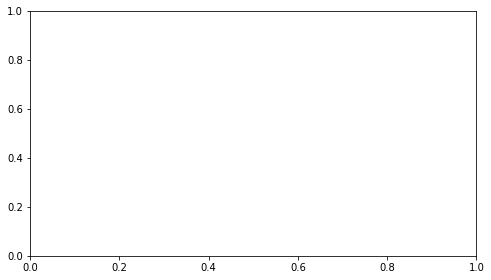

In [26]:
plt.figure(figsize=(2*4,1.5*3))
plt.plot(C, Integral_pinhole_16/np.max(Integral_pinhole_16), color='black', label=r'$\hat{\theta} = 16$')
plt.plot(C, Integral_pinhole_12/np.max(Integral_pinhole_16), color='blue', linestyle='--', label=r'$\hat{\theta} = 12$')
plt.plot(C, Integral_pinhole_8/np.max(Integral_pinhole_16), color='green',linestyle='-.', label=r'$\hat{\theta} = 8$')
plt.plot(C, Integral_pinhole_4/np.max(Integral_pinhole_16), color='red',linestyle=':', label=r'$\hat{\theta} = 4$')
plt.plot(C, Integral_pinhole_1/np.max(Integral_pinhole_16), color='gray',linestyle=(0, (1, 1)), label=r'$\hat{\theta} = 1$')
plt.plot(C, Integral_pinhole_0_5/np.max(Integral_pinhole_16), color='tan',linestyle=(0, (3, 1, 1, 1, 1, 1)), label=r'$\hat{\theta} = 0.5$')

plt.xlabel(r'$\hat{C}$', fontsize=14, labelpad = 0.0)
y = plt.ylabel(r'$I/I_0$', fontsize=14, labelpad = 0.0, rotation=90)
y.set_rotation(0)

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['top'].set_position(('axes',0))
ax.yaxis.set_ticks_position('left')
ax.spines['top'].set_position(('data',0))
ax.xaxis.set_label_coords(1, -0.02)
ax.yaxis.set_label_coords(-0.03, 1.0)


leg = plt.legend(fontsize=12)#loc='upper left')
# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

# Change to location of the legend. 
xOffset = 0.2
bb.x0 += 0.1
bb.x1 += 0.01
bb.y0 += 0.
leg.set_bbox_to_anchor(bb, transform = ax.transAxes)
    
plt.xlim(-140, 20)
plt.ylim(0, 1.1)
plt.tight_layout()

plt.xticks([-120, -100, -80, -60, -40, -20, 0],fontsize=10)
        #  [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([0.2,0.4,0.6,0.8,1.0], fontsize=10)
        #  [r'$-1$', r'$0$', r'$+1$'])

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(12)
    label.set_bbox(dict(facecolor='white', alpha=0.1, edgecolor='white'), )

plt.savefig('/home/andrei/Documents/SKIF_XAS_beamline/TeXDoc/pic/spec_integ_ang.pdf')#, bbox_inches='tight')
plt.show()    